In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
misconceptions = pd.read_csv('kaggle/input/eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv', index_col='MisconceptionId')
train = pd.read_csv('kaggle/input/eedi-mining-misconceptions-in-mathematics/train.csv')
test = pd.read_csv('kaggle/input/eedi-mining-misconceptions-in-mathematics/test.csv')
train_melted = pd.read_csv('kaggle/input/eedi-mining-misconceptions-in-mathematics/train_melted.csv')

## EDA

In [4]:
print(f"train: {train.shape[0]} problems")
print(f"test: {test.shape[0]} problems")
print(f"misconceptions: {misconceptions.shape[0]} misconceptions")

train: 1869 problems
test: 3 problems
misconceptions: 2587 misconceptions


In [5]:
print(f"train_melted: {train_melted.shape[0]} answer options")
print(f"no label: {train_melted['MisconceptionId'].isna().sum()}")
print(f"unique label: {(train_melted['MisconceptionId'].value_counts() == 1).sum()}")


train_melted: 5607 answer options
no label: 1237
unique label: 747


In [6]:
# Count the number of occurrences of each misconception in train_melted
misconception_counts = train_melted['MisconceptionId'].value_counts()

# Create a filtered misconceptions DataFrame
misconceptions_short = misconceptions.loc[misconception_counts[misconception_counts >= 2].index]

misconceptions_short.shape
# misconceptions_short.to_csv('misconceptions_short.csv')

(857, 1)

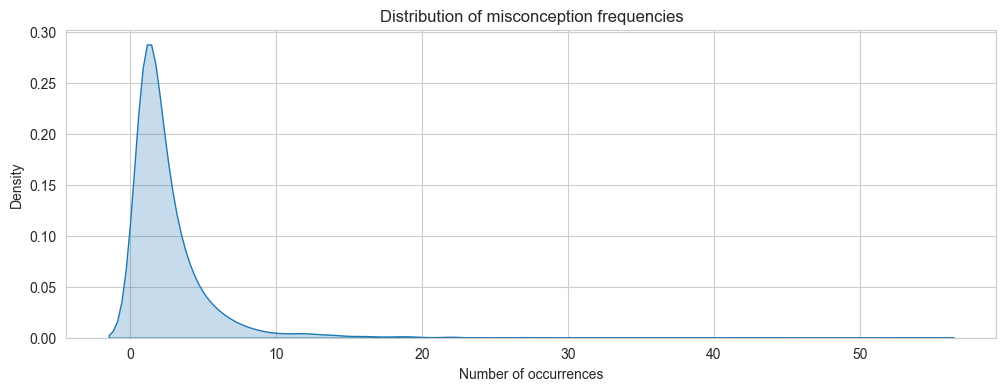

Percentage of answer options with no misconception: 41.5%


In [10]:
# Count misconceptions across all answer options and get value counts
misconception_counts = train[['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']].melt()['value'].dropna()
misconception_value_counts = misconception_counts.value_counts()

plt.figure(figsize=(12,4))
sns.kdeplot(data=misconception_value_counts.values, fill=True)
plt.title('Distribution of misconception frequencies')
plt.xlabel('Number of occurrences') 
plt.ylabel('Density')
plt.savefig('figures/pdf/misconception-kde.pdf', dpi=300)
plt.savefig('figures/jpg/misconception-kde.jpg', dpi=300)

plt.show()

# Calculate total number of answer options
total_answers = train[['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']].size

# Count number of null misconceptions
null_misconceptions = train[['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']].isna().sum().sum()

# Calculate and print percentage
pct_no_misconception = (null_misconceptions / total_answers) * 100
print(f"Percentage of answer options with no misconception: {pct_no_misconception:.1f}%")

In [9]:
train.head()

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calculations involving powers,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets need to go to make the answer equal \( 13 \) ?,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0
1,1,1612,Simplify an algebraic fraction by factorising the numerator,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{m^{2}+2 m-3}{m-3} \)",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify,2142.0,143.0,2142.0,NaN
2,2,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,"Tom and Katie are discussing the \( 5 \) plants with these heights:\n\( 24 \mathrm{~cm}, 17 \mathrm{~cm}, 42 \mathrm{~cm}, 26 \mathrm{~cm}, 13 \mathrm{~cm} \)\nTom says if all the plants were cut in half, the range wouldn't change.\nKatie says if all the plants grew by \( 3 \mathrm{~cm} \) each, the range wouldn't change.\nWho do you agree with?",Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct,1287.0,NaN,1287.0,1073.0
3,3,2377,Recall and use the intersecting diagonals properties of a rectangle,88,Properties of Quadrilaterals,C,The angles highlighted on this rectangle with different length sides can never be... ![A rectangle with the diagonals drawn in. The angle on the right hand side at the centre is highlighted in red and the angle at the bottom at the centre is highlighted in yellow.](),acute,obtuse,\( 90^{\circ} \),Not enough information,1180.0,1180.0,NaN,1180.0
4,4,3387,Substitute positive integer values into formulae involving powers or roots,67,Substitution into Formula,A,The equation \( f=3 r^{2}+3 \) is used to find values in the table below. What is the value covered by the star? \begin{tabular}{|c|c|c|c|c|}\n\hline\( r \) & \( 1 \) & \( 2 \) & \( 3 \) & \( 4 \) \\\n\hline\( f \) & \( 6 \) & \( 15 \) & \( \color{gold}\bigstar \) & \\\n\hline\n\end{tabular},\( 30 \),\( 27 \),\( 51 \),\( 24 \),NaN,NaN,NaN,1818.0


## Create train_melted 

In [6]:
train.head(1)

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calculations involving powers,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets need to go to make the answer equal \( 13 \) ?,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0


In [7]:
#########################
# Create train_melted 
#########################

# Define the identifier columns
id_cols = [
    'QuestionId', 'ConstructId', 'ConstructName', 
    'SubjectId', 'SubjectName', 'CorrectAnswer', 'QuestionText'
]

# Define the corresponding Answer options
answer_cols = ['AnswerAText', 'AnswerBText', 'AnswerCText', 'AnswerDText']
misconception_cols = ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']

# Melt Answer Text
text_melted = train.melt(
    id_vars=id_cols,
    value_vars=answer_cols,
    var_name='Attribute',
    value_name='AnswerText'
)

# Melt Misconception IDs
misconception_melted = train.melt(
    id_vars=id_cols,
    value_vars=misconception_cols,
    var_name='Attribute',
    value_name='MisconceptionId'
)

# Extract the option letter (A, B, C, D) and the attribute type
text_melted['AnswerOption'] = text_melted['Attribute'].str.extract(r'Answer([ABCD])Text')[0]
misconception_melted['AnswerOption'] = misconception_melted['Attribute'].str.extract(r'Misconception([ABCD])Id')[0]

# Drop the original 'Attribute' columns as they are no longer needed
text_melted.drop('Attribute', axis=1, inplace=True)
misconception_melted.drop('Attribute', axis=1, inplace=True)

# Merge the two melted DataFrames on id_vars and AnswerOption
train_melted = pd.merge(
    text_melted,
    misconception_melted,
    on=id_cols + ['AnswerOption'],
    how='left'
)

train_melted = train_melted.merge(misconceptions, left_on='MisconceptionId', right_index=True, how='left')
train_melted = train_melted[train_melted['CorrectAnswer'] != train_melted['AnswerOption']]

In [8]:
print(train_melted.shape)
train_melted[train_melted['QuestionId'] == 0]

(5607, 11)


,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerText,AnswerOption,MisconceptionId,MisconceptionName
1869,0,856,Use the order of operations to carry out calculations involving powers,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets need to go to make the answer equal \( 13 \) ?,\( 3 \times 2+(4-5) \),B,NaN,NaN
3738,0,856,Use the order of operations to carry out calculations involving powers,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets need to go to make the answer equal \( 13 \) ?,\( 3 \times(2+4-5) \),C,NaN,NaN
5607,0,856,Use the order of operations to carry out calculations involving powers,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets need to go to make the answer equal \( 13 \) ?,Does not need brackets,D,1672.0,"Confuses the order of operations, believes addition comes before multiplication"


In [9]:
train_melted.to_csv('train_melted.csv', index=False)


In [10]:
#########################
# Create test_melted 
#########################

# Include 'QuestionText' in id_vars to preserve it in the melted DataFrame
test_melted = test.melt(
    id_vars=['QuestionId', 'QuestionText', 'CorrectAnswer'],
    value_vars=['AnswerAText', 'AnswerBText', 'AnswerCText', 'AnswerDText'],
    var_name='AnswerOption',
    value_name='AnswerText'
)

# Clean the 'AnswerOption' column to obtain A, B, C, D
test_melted['AnswerOption'] = test_melted['AnswerOption'].str.replace('Answer', '').str.replace('Text', '')

test_melted['QA_Id'] = test_melted['QuestionId'].astype(str) + '_' + test_melted['AnswerOption']

# Drop correct answers
test_melted = test_melted[test_melted['CorrectAnswer'] != test_melted['AnswerOption']]

test_melted.head()


,QuestionId,QuestionText,CorrectAnswer,AnswerOption,AnswerText,QA_Id
1,1870,"Simplify the following, if possible: \( \frac{m^{2}+2 m-3}{m-3} \)",D,A,\( m+1 \),1870_A
2,1871,"Tom and Katie are discussing the \( 5 \) plants with these heights:\n\( 24 \mathrm{~cm}, 17 \mathrm{~cm}, 42 \mathrm{~cm}, 26 \mathrm{~cm}, 13 \mathrm{~cm} \)\nTom says if all the plants were cut in half, the range wouldn't change.\nKatie says if all the plants grew by \( 3 \mathrm{~cm} \) each, the range wouldn't change.\nWho do you agree with?",B,A,Only\nTom,1871_A
3,1869,\[\n3 \times 2+4-5\n\]\nWhere do the brackets need to go to make the answer equal \( 13 \) ?,A,B,\( 3 \times 2+(4-5) \),1869_B
4,1870,"Simplify the following, if possible: \( \frac{m^{2}+2 m-3}{m-3} \)",D,B,\( m+2 \),1870_B
6,1869,\[\n3 \times 2+4-5\n\]\nWhere do the brackets need to go to make the answer equal \( 13 \) ?,A,C,\( 3 \times(2+4-5) \),1869_C


In [11]:
test.head()

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText
0,1869,856,Use the order of operations to carry out calculations involving powers,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets need to go to make the answer equal \( 13 \) ?,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets
1,1870,1612,Simplify an algebraic fraction by factorising the numerator,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{m^{2}+2 m-3}{m-3} \)",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify
2,1871,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,"Tom and Katie are discussing the \( 5 \) plants with these heights:\n\( 24 \mathrm{~cm}, 17 \mathrm{~cm}, 42 \mathrm{~cm}, 26 \mathrm{~cm}, 13 \mathrm{~cm} \)\nTom says if all the plants were cut in half, the range wouldn't change.\nKatie says if all the plants grew by \( 3 \mathrm{~cm} \) each, the range wouldn't change.\nWho do you agree with?",Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct
